<span style="color: blue; font-size: 20px; font-family: 'Courier New', monospace; font-style: italic;">Hongpei (Harvey) Huang</span>

## 1. Import the Packages and Data

In [43]:
File_Location = str("D:\\Document\\Research\\Hospital Occupancy Monitoring Project\\BioYODIE\\")

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [45]:
df_Excel_Raw = pd.read_excel(File_Location + str("Data\\Canada_Hosp1_COVID_InpatientData (Input Data).xlsx"))

comorbidities_other = df_Excel_Raw['comorbidities_other']
comorbidities_other = comorbidities_other.dropna()
comorbidities_other = comorbidities_other.reset_index(drop=True)

comorbidities_other

0      GERD (gastroesophageal reflux disease), Dement...
1      Closed fracture of fifth metatarsal bone, Dive...
2      Parkinson's Disease, Back pain, Benign Prostat...
3      TAVI, Atrial fibrillation, Gastric Reflux, Pac...
4      Coronary artery disease with previous bypass s...
                             ...                        
399    Depression, GERD (gastroesophageal reflux dise...
400                                         Dyslipidemia
401    Arthritis, High cholesterol, Hypothyroidism, V...
402    GERD (gastroesophageal reflux disease), High c...
403    Dermatitis, Hyponatremia, Irritable bowel synd...
Name: comorbidities_other, Length: 404, dtype: object

In [46]:
df_Excel_Raw

,id,reason_for_admission,age,sex,ethnicity,ethnicity_other,height,weight,comorbidities,comorbidities_other,...,pao2,pao2_fio2,ph,high_senstivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp
0,1,Fever [R50.9],74,Male,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,223.0,NaN
1,2,Pneumonia [J18.9],61,Female,"""[]""",NaN,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2354,95.6,NaN
2,3,Pneumonia [J18.9],58,Female,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\""]""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Suspected COVID-19 virus infection [U07.2],94,Male,"""[]""",NaN,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"Febrile respiratory illness [J98.9, R50.9]",91,Male,"""[]""",NaN,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,Shortness of breath [R06.0],74,Female,"""[]""",NaN,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
504,517,COVID-19 [U07.1],81,Male,"""[]""",NaN,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...",...,76.0,1.5,7.44,NaN,NaN,NaN,NaN,>4000,NaN,NaN
505,519,COVID-19 [U07.1],74,Male,"""[]""",NaN,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...",...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
506,521,COVID-19 [U07.1],48,Female,"""[]""",NaN,180.0,95.3,"""[]""",NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,428,NaN,NaN


In [47]:
# Function to load data from a single file
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    return data

def load_files_to_dataframe(directory_path):
    # Creating an empty DataFrame to store the data
    df = pd.DataFrame()

    # Reading data from 'resultFile.txt' and adding it to the DataFrame first
    result_file_path = os.path.join(directory_path, "resultFile.txt")
    if os.path.exists(result_file_path):
        result_data = load_data(result_file_path)
        result_df = pd.DataFrame(result_data, columns=['Text'])
        result_df['File'] = "resultFile.txt"
        df = pd.concat([result_df, df]).reset_index(drop=True)
    else:
        print(f"File not found: {result_file_path}")

    # Iterating over each file and loading the data into the DataFrame
    for i in range(1, 101):  # 1 to 100 inclusive
        file_path = os.path.join(directory_path, f"resultFile ({i}).txt")

        if os.path.exists(file_path):
            data = load_data(file_path)

            # Assuming each line in the file is a separate record
            temp_df = pd.DataFrame(data, columns=['Text'])

            # Adding a column to identify the file
            temp_df['File'] = f"resultFile ({i}).txt"

            # Appending data to the main DataFrame
            df = df.append(temp_df, ignore_index=True)
        else:
            print(f"File not found: {file_path}")

    # Returning the DataFrame containing data from all files
    return df

def add_pref_columns(df, column_name='Text'):
    # Iterating over each row in the DataFrame
    for index, row in df.iterrows():
        text = row[column_name]
        
        # Finding all occurrences of the pattern "PREF":"<content>"
        start_idx = text.find('"PREF":"')
        
        while start_idx != -1:
            start_idx += 8  # Skipping the '"PREF":"' part
            end_idx = text.find('"', start_idx)
            
            if end_idx != -1:
                pref_value = text[start_idx:end_idx]
                
                # Checking if the column already exists, if not then creating it
                if pref_value not in df.columns:
                    df[pref_value] = 0
                
                # Incrementing the value in the corresponding column
                df.at[index, pref_value] += 1
            
            # Looking for the next occurrence
            start_idx = text.find('"PREF":"', end_idx)
    
    return df

# Defining a function to convert non-zero numbers to 1
def convert_non_zero_to_one(value):
    if isinstance(value, (int, float)) and value != 0:
        return 1
    return value

In [48]:
directory_path_1 = File_Location + str("BioYODIE Text Files (404 Patients Who Have Comorbidities)\\0 - 100")
directory_path_2 = File_Location + str("BioYODIE Text Files (404 Patients Who Have Comorbidities)\\101 - 201")
directory_path_3 = File_Location + str("BioYODIE Text Files (404 Patients Who Have Comorbidities)\\202 - 302")
directory_path_4 = File_Location + str("BioYODIE Text Files (404 Patients Who Have Comorbidities)\\303 - 403")

df_1 = load_files_to_dataframe(directory_path_1)
df_2 = load_files_to_dataframe(directory_path_2)
df_3 = load_files_to_dataframe(directory_path_3)
df_4 = load_files_to_dataframe(directory_path_4)

df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

data = df['Text']

df_PREF = pd.DataFrame(data)

# Calling the function and printing the resulting DataFrame
df_PREF = add_pref_columns(df_PREF)

# Applying the function to all columns except 'Text'
columns_except_text = [col for col in df_PREF.columns if col != 'Text']
df_PREF[columns_except_text] = df_PREF[columns_except_text].applymap(convert_non_zero_to_one)
df_PREF = df_PREF.iloc[0:,1:]

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:35: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\harve\AppData\Local\Temp\ipykernel_21312\3673309222.py:59: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

In [49]:
df_PREF

,Acid Reflux,closed fracture of fifth metatarsal,Diverticulosis,Colon spasm,Vertigo,parkinson's,Backache,BPH,Cholecystitis chronic,Nephropathy,...,Opisthocranion,Colonoscopy,Aneurysm;artery;cerebral,Bilateral inguinal hernia,Schizoaffective Disorder,Acoustic Tumor,Eardrum,"ERCP, NOS",Antral,Osteoglophonic dwarfism
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
402,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Reducing the Number of Features Based on the Number of Occurrences

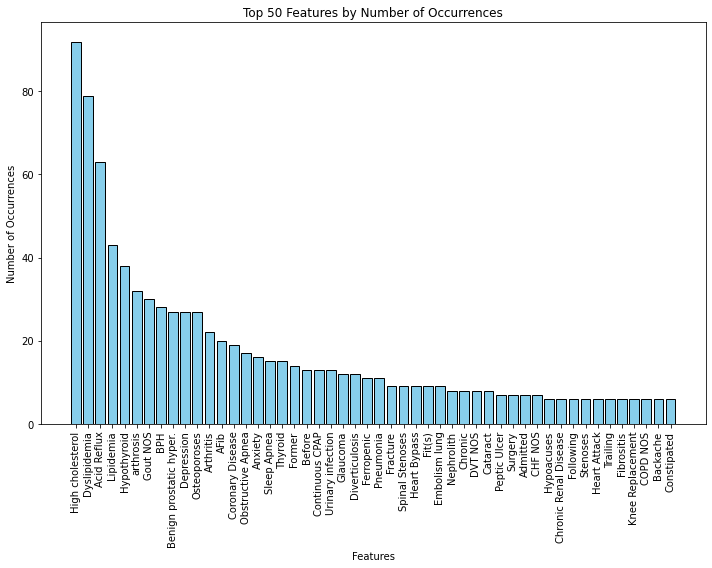

High cholesterol           92
Dyslipidemia               79
Acid Reflux                63
Lipidemia                  43
Hypothyroid                38
arthrosis                  32
Gout NOS                   30
BPH                        28
Benign prostatic hyper.    27
Depression                 27
Osteoporoses               27
Arthritis                  22
AFib                       20
Coronary Disease           19
Obstructive Apnea          17
Anxiety                    16
Sleep Apnea                15
Thyroid                    15
Former                     14
Before                     13
Continuous CPAP            13
Urinary infection          13
Glaucoma                   12
Diverticulosis             12
Ferropenic                 11
Pneumonia                  11
Fracture                    9
Spinal Stenoses             9
Heart Bypass                9
Fit(s)                      9
Embolism lung               9
Nephrolith                  8
Chronic                     8
DVT NOS   

In [50]:
feature_occurrences = df_PREF.sum(axis=0).sort_values(ascending=False)

# Plotting the distribution of the top 50 feature occurrences
plt.figure(figsize=(10, 8))

# Since we only want the top 50 features, we slice the series
top_features = feature_occurrences.head(50)
plt.bar(top_features.index, top_features.values, color='skyblue', edgecolor='black')

plt.title('Top 50 Features by Number of Occurrences')
plt.xlabel('Features')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels to be readable

plt.tight_layout()
plt.show()

# Optionally, print out the feature names and their counts
print(top_features)

In [51]:
# Determine the threshold (1% of 404 rows)
threshold = 0.01 * 404

# Filter out features that occur less frequently than the threshold
filtered_features = feature_occurrences[feature_occurrences > threshold].index.tolist()

# Reduced dataframe
df_reduced = df_PREF[filtered_features]

least_occurrence = feature_occurrences.min()

print(f"Original number of features: {df_PREF.shape[1]}")
print(f"Reduced number of features: {df_reduced.shape[1]}")
print(f"The least number of occurrences for a single feature is: {least_occurrence}")

Original number of features: 739
Reduced number of features: 57
The least number of occurrences for a single feature is: 1


In [52]:
df_reduced

,High cholesterol,Dyslipidemia,Acid Reflux,Lipidemia,Hypothyroid,arthrosis,Gout NOS,BPH,Benign prostatic hyper.,Depression,...,COPD NOS,Backache,Constipated,Anemia,Prostate Cancer,Hemorrhoid,PCI,Renal graft,Falling,Mild cognitive disorder
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
400,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Reducing the Number of Features Based on Pairwise Correlations

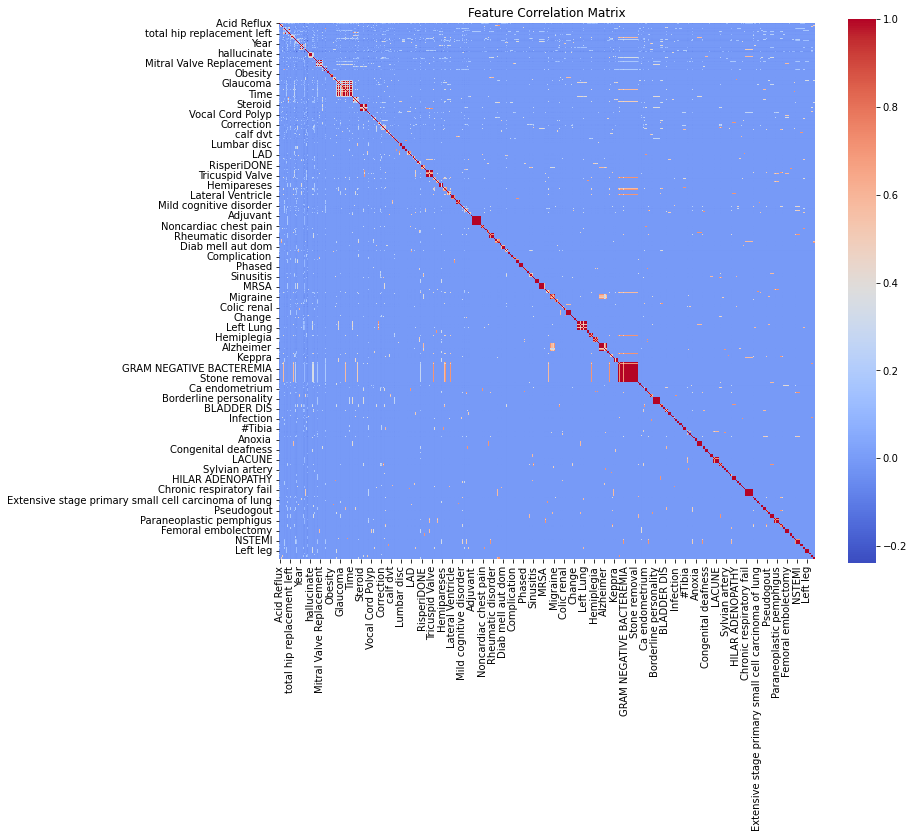

In [55]:
# Calculate the pairwise correlation matrix
correlation_matrix = df_PREF.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [56]:
correlation_matrix

,Acid Reflux,closed fracture of fifth metatarsal,Diverticulosis,Colon spasm,Vertigo,parkinson's,Backache,BPH,Cholecystitis chronic,Nephropathy,...,Opisthocranion,Colonoscopy,Aneurysm;artery;cerebral,Bilateral inguinal hernia,Schizoaffective Disorder,Acoustic Tumor,Eardrum,"ERCP, NOS",Antral,Osteoglophonic dwarfism
Acid Reflux,1.000000,-0.021411,0.045361,-0.042983,-0.042983,0.042292,0.003630,0.017022,0.115892,0.042292,...,-0.021411,-0.021411,-0.021411,-0.021411,0.115892,-0.021411,-0.021411,-0.021411,-0.021411,-0.021411
closed fracture of fifth metatarsal,-0.021411,1.000000,0.284708,0.498135,0.498135,-0.004309,-0.006116,-0.013594,-0.002481,-0.004309,...,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481
Diverticulosis,0.045361,0.284708,1.000000,0.129765,0.129765,0.154697,-0.021482,0.124479,-0.008716,-0.015133,...,-0.008716,-0.008716,0.284708,0.284708,-0.008716,-0.008716,-0.008716,-0.008716,-0.008716,-0.008716
Colon spasm,-0.042983,0.498135,0.129765,1.000000,0.242500,-0.008649,-0.012278,-0.027289,-0.004981,-0.008649,...,-0.004981,-0.004981,-0.004981,-0.004981,-0.004981,-0.004981,-0.004981,-0.004981,0.498135,0.498135
Vertigo,-0.042983,0.498135,0.129765,0.242500,1.000000,-0.008649,-0.012278,-0.027289,-0.004981,-0.008649,...,-0.004981,-0.004981,-0.004981,-0.004981,-0.004981,0.498135,0.498135,0.498135,-0.004981,-0.004981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Acoustic Tumor,-0.021411,-0.002481,-0.008716,-0.004981,0.498135,-0.004309,-0.006116,-0.013594,-0.002481,-0.004309,...,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,1.000000,1.000000,1.000000,-0.002481,-0.002481
Eardrum,-0.021411,-0.002481,-0.008716,-0.004981,0.498135,-0.004309,-0.006116,-0.013594,-0.002481,-0.004309,...,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,1.000000,1.000000,1.000000,-0.002481,-0.002481
"ERCP, NOS",-0.021411,-0.002481,-0.008716,-0.004981,0.498135,-0.004309,-0.006116,-0.013594,-0.002481,-0.004309,...,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,1.000000,1.000000,1.000000,-0.002481,-0.002481
Antral,-0.021411,-0.002481,-0.008716,0.498135,-0.004981,-0.004309,-0.006116,-0.013594,-0.002481,-0.004309,...,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,-0.002481,1.000000,1.000000


In [58]:
# Set the correlation threshold
threshold = 0.5

# Create an empty set to hold all the names of highly correlated features
features_to_remove = set()

# Iterate over the columns of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # If the correlation is above the threshold
            colname = correlation_matrix.columns[i]  # Get the name of the column
            features_to_remove.add(colname)

# Remove the features from the dataframe
df_reduced = df_PREF.drop(columns=features_to_remove)

print(f"Original number of features: {df_PREF.shape[1]}")
print(f"Reduced number of features: {df_reduced.shape[1]}")

Original number of features: 739
Reduced number of features: 233


In [59]:
df_reduced

,Acid Reflux,closed fracture of fifth metatarsal,Diverticulosis,Colon spasm,Vertigo,parkinson's,Backache,BPH,Gout NOS,Osteoporoses,...,eye glaucoma,Pseudogout,Measles,Lumbago,Hernia abdominal wall,Bypass graft stenosis,Na excess,Body mass index,Aneurysm;artery;cerebral,Schizoaffective Disorder
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. PCA Analysis - All n_components (0-1)

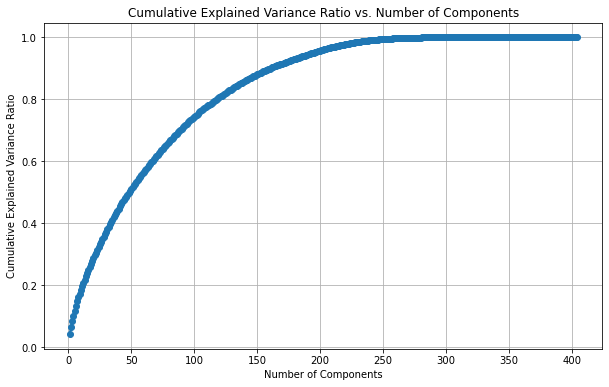

In [8]:
# If we pass a float between 0 and 1, PCA will choose the number of components such that the total variance explained is greater than the value provided.
# For example, if n_components=0.9, PCA will choose the number of components that together explain at least 90% of the total variance.

# The cumulative explained variance ratio is a measure used to assess how much variance in the data is captured by a certain number of principal components in Principal Component Analysis (PCA).

# In PCA, each principal component explains a certain percentage of the variance in the original data. The explained variance ratio of each principal component is calculated as the proportion of the total variance that each principal component explains.


# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_PREF)

# Performing PCA with all components
pca = PCA()
pca.fit(scaled_data)

# Getting the explained variance ratio and calculating the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

## 5. PCA Analysis - n_components=0.9

In [9]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_PREF)

# Performing PCA
pca = PCA(n_components=0.9)  # 0.9 threshold for explained variance
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components)
pc_df.columns = [f'PC{i+1}' for i in range(pc_df.shape[1])]

# Displaying the number of principal components chosen
print(f"Number of principal components chosen when n_components = 0.9: {pca.n_components_}")

# Displaying the explained variance ratio of the principal components
print("Explained Variance Ratios: ", pca.explained_variance_ratio_)
print("Total Variance Explained: ", sum(pca.explained_variance_ratio_))

Number of principal components chosen when n_components = 0.9: 161
Explained Variance Ratios:  [0.04258904 0.02235301 0.01832626 0.01734368 0.01681438 0.01631304
 0.0144485  0.01258088 0.01241171 0.01152504 0.01139604 0.01115468
 0.01106088 0.01068997 0.01021458 0.00987495 0.00962353 0.00951127
 0.00945898 0.00929696 0.00922047 0.00911573 0.0088349  0.00877791
 0.00860109 0.00853841 0.00849383 0.00818531 0.00814821 0.00810974
 0.00792675 0.00789917 0.00777149 0.00766512 0.00753448 0.00733621
 0.00721837 0.00712862 0.00707028 0.00692964 0.00686134 0.00660952
 0.00658816 0.00637234 0.00627191 0.00620345 0.00615346 0.00609767
 0.00603564 0.00600893 0.00593277 0.00578387 0.00574635 0.00565053
 0.00557778 0.00548962 0.00547139 0.00541407 0.00538998 0.00536941
 0.00517686 0.00512261 0.00508408 0.00501629 0.00500974 0.00495482
 0.00494063 0.00489415 0.00488008 0.00485085 0.00484387 0.00476942
 0.00473958 0.00469251 0.00467701 0.00466461 0.00460141 0.00453859
 0.0045141  0.00447336 0.00445401 

In [10]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161
0,-0.451304,-0.244504,-0.175865,-0.196499,-0.146062,-0.171547,-0.242837,-0.136495,-0.378938,0.008245,...,0.195561,-0.147278,0.120125,-0.017360,-0.087377,0.017369,-0.336885,-0.253342,0.130192,0.151372
1,-0.142453,-0.425075,-0.214079,-0.244724,-0.120560,-0.242092,-0.137829,-0.288658,-0.576215,-0.225768,...,-1.724206,0.480610,3.028463,-5.192448,0.215919,-0.312750,1.276090,-0.743042,1.382051,-0.182144
2,0.859689,-0.318991,-0.450648,-0.478760,-0.503116,-0.037551,-0.649070,0.451103,-0.488423,-0.920186,...,-0.474186,-0.003220,0.894149,0.398622,-0.853273,-1.227462,-0.376353,0.475383,0.251400,0.080763
3,0.834175,0.080204,-0.325300,-0.198861,-0.263699,-0.339664,-0.345743,-0.639141,-0.029030,-0.079554,...,0.985364,-2.615719,-1.103487,0.028531,1.948662,-2.453838,0.132702,1.344669,1.256365,-0.646657
4,0.190285,0.468711,-0.420573,-0.469631,-0.470960,-0.432508,-0.137980,0.337707,0.085095,-1.293065,...,1.412066,-1.749319,-1.825744,-0.973755,-3.851809,4.448194,-1.183609,-0.571656,-3.166495,-0.032005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.466776,-0.295979,-0.277067,-0.079077,-0.225506,-0.282326,-0.411729,0.018594,-0.493782,-0.203307,...,-0.056114,0.328443,0.250826,-0.365419,-0.238757,0.174631,-0.654450,-0.184954,0.817823,0.114664
400,-0.393247,-0.249591,-0.184488,-0.087293,-0.262030,-0.081364,-0.250094,-0.124546,-0.384452,0.100927,...,-0.116560,-0.493212,0.010845,0.066045,-0.316055,0.191031,0.173634,0.131413,0.102827,-0.004390
401,1.511738,-0.727553,-0.478220,-0.128310,-0.621255,-0.558744,1.108031,-1.612335,-0.078563,0.265341,...,0.084614,-0.569327,-0.418537,0.878010,0.034473,0.219225,0.244433,0.924488,-0.555739,0.973746
402,-0.474572,-0.259073,-0.225678,-0.048826,-0.171621,-0.208098,-0.296186,-0.162498,-0.476845,-0.069683,...,0.339194,-0.118974,-0.148945,-0.028087,0.057263,-0.208193,-0.436638,-0.073776,0.362660,0.062977


In [11]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_PREF)

# Performing PCA
pca = PCA(n_components=0.9)  
principal_components = pca.fit_transform(scaled_data)

# Getting the components
components = pca.components_

# Creating a DataFrame to hold the principal components and the corresponding original features
components_df = pd.DataFrame(components, columns=df_PREF.columns)

# For each principal component, get the features with the highest absolute contribution
num_features_to_display = 10  # You can change this value as needed

for i, component in enumerate(components):
    print(f"Principal Component {i+1}:")
    top_features = components_df.iloc[i].abs().nlargest(num_features_to_display)
    print(top_features)
    print("\n")

# If you want to know which features have the highest contributions across all chosen principal components
highest_contrib_features = components_df.abs().max(axis=0).nlargest(num_features_to_display)
print("Highest contributing features across all chosen principal components:")
print(highest_contrib_features)

Principal Component 1:
HYPOKINESIS GLOBAL          0.177435
Incompetence;mitral         0.177435
Autonomic Neuropathy        0.177435
Bilateral hydronephrosis    0.177435
Urinary obstruction         0.177435
SACRAL ULCER                0.177435
GRAM NEGATIVE BACTEREMIA    0.177435
Pyelonephritis              0.177435
Obstruction ureter          0.177435
Stone;ureter                0.177435
Name: 0, dtype: float64


Principal Component 2:
Stable Angina               0.242375
Nonalcoholic Fatty Liver    0.242375
Pylethrombosis              0.242375
R knee                      0.242375
Scanning                    0.242375
Abdominal ultrasound        0.242375
Spinal Block                0.242375
Exercise                    0.242375
Spinal decompression        0.242375
Complications               0.242375
Name: 1, dtype: float64


Principal Component 3:
AzaTHIOprine              0.260886
Oxychlorochin             0.260886
Fevers                    0.260886
Coughs                    0.260886

Cancer                     0.329702
Thymoma                    0.329702
prostate                   0.329702
Detached right retina      0.306804
Correction                 0.306804
Diabetic Nephropathy       0.206097
Diabetic Retinopathy       0.181530
Benign prostatic hyper.    0.115636
Scolioses                  0.113045
Glaucoma                   0.101247
Name: 86, dtype: float64


Principal Component 88:
Removal of spleen     0.265280
Gout attack           0.265280
Myelofibroses         0.265280
Tardive dystonia      0.188768
Character disorder    0.179271
BIPOLAR DIS           0.164757
Thalassemia           0.132046
Urinary               0.132046
Morbid Obesity        0.131013
Cholesterol           0.131013
Name: 87, dtype: float64


Principal Component 89:
Removal of spleen           0.391253
Gout attack                 0.391253
Myelofibroses               0.391253
Cholesterol                 0.267658
Morbid Obesity              0.267658
Slipped Disc                0.252816
Contin

Colic renal                0.432532
Lens implant               0.355904
Urolithiases               0.276821
extraction                 0.245245
Paroxysmal                 0.206554
Gastrointestinal reflux    0.205029
Rotor                      0.176910
Cuffing                    0.176910
Sarcoid                    0.135345
Complete AV Block          0.127575
Name: 144, dtype: float64


Principal Component 146:
Meningioma                 0.391621
Paroxysmal                 0.291402
Lens implant               0.238284
Colic renal                0.229901
Brain Tumor                0.219188
Gastrointestinal reflux    0.196982
Complete AV Block          0.185901
extraction                 0.165248
Removal                    0.149849
Urolithiases               0.147911
Name: 145, dtype: float64


Principal Component 147:
Meningioma             0.543158
Brain Tumor            0.303173
Lens implant           0.302381
extraction             0.209182
Removal                0.208375
Biotherapy    

## 6. Replace PCA Result as Independent Variables for Input Data

In [12]:
df_pca = pc_df.copy()
nan_indices = df_Excel_Raw[df_Excel_Raw['comorbidities_other'].isna()].index.tolist()

for index in nan_indices:
    nan_row = pd.DataFrame(data=[[np.nan] * len(df_pca.columns)], columns=df_pca.columns)
    df_pca = pd.concat([df_pca.iloc[:index], nan_row, df_pca.iloc[index:]]).reset_index(drop=True)
    
df_pca.insert(0, 'id', df_Excel_Raw.iloc[:, 0:1])
    
df_pca

,id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161
0,1,-0.451304,-0.244504,-0.175865,-0.196499,-0.146062,-0.171547,-0.242837,-0.136495,-0.378938,...,0.195561,-0.147278,0.120125,-0.017360,-0.087377,0.017369,-0.336885,-0.253342,0.130192,0.151372
1,2,-0.142453,-0.425075,-0.214079,-0.244724,-0.120560,-0.242092,-0.137829,-0.288658,-0.576215,...,-1.724206,0.480610,3.028463,-5.192448,0.215919,-0.312750,1.276090,-0.743042,1.382051,-0.182144
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.859689,-0.318991,-0.450648,-0.478760,-0.503116,-0.037551,-0.649070,0.451103,-0.488423,...,-0.474186,-0.003220,0.894149,0.398622,-0.853273,-1.227462,-0.376353,0.475383,0.251400,0.080763
4,5,0.834175,0.080204,-0.325300,-0.198861,-0.263699,-0.339664,-0.345743,-0.639141,-0.029030,...,0.985364,-2.615719,-1.103487,0.028531,1.948662,-2.453838,0.132702,1.344669,1.256365,-0.646657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,1.511738,-0.727553,-0.478220,-0.128310,-0.621255,-0.558744,1.108031,-1.612335,-0.078563,...,0.084614,-0.569327,-0.418537,0.878010,0.034473,0.219225,0.244433,0.924488,-0.555739,0.973746
504,517,-0.474572,-0.259073,-0.225678,-0.048826,-0.171621,-0.208098,-0.296186,-0.162498,-0.476845,...,0.339194,-0.118974,-0.148945,-0.028087,0.057263,-0.208193,-0.436638,-0.073776,0.362660,0.062977
505,519,-0.194852,0.264448,-0.753751,-1.031778,3.816068,-0.067715,1.843999,-1.615121,-1.669491,...,0.503535,0.504353,-0.911733,0.138891,1.160117,0.655855,0.300211,-0.379413,0.081776,0.167844
506,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## Now we can see it matches with original data

df_Excel_Raw

,id,reason_for_admission,age,sex,ethnicity,ethnicity_other,height,weight,comorbidities,comorbidities_other,...,pao2,pao2_fio2,ph,high_senstivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp
0,1,Fever [R50.9],74,Male,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,223.0,NaN
1,2,Pneumonia [J18.9],61,Female,"""[]""",NaN,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2354,95.6,NaN
2,3,Pneumonia [J18.9],58,Female,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\""]""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Suspected COVID-19 virus infection [U07.2],94,Male,"""[]""",NaN,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"Febrile respiratory illness [J98.9, R50.9]",91,Male,"""[]""",NaN,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,Shortness of breath [R06.0],74,Female,"""[]""",NaN,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
504,517,COVID-19 [U07.1],81,Male,"""[]""",NaN,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...",...,76.0,1.5,7.44,NaN,NaN,NaN,NaN,>4000,NaN,NaN
505,519,COVID-19 [U07.1],74,Male,"""[]""",NaN,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...",...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
506,521,COVID-19 [U07.1],48,Female,"""[]""",NaN,180.0,95.3,"""[]""",NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,428,NaN,NaN


## Alterative Approach 1 - Logisic PCA

[Dimensionality reduction for binary data through the projection of natural parameters   - Andrew J. Landgraf, Yoonkyung Lee (2020)](https://www.sciencedirect.com/science/article/abs/pii/S0047259X20302499)

In [ ]:
# It has No Reliable Package for Python, but has package in R

# The run time is long

In [ ]:
## do not run this, the run time is very long

import numpy as np
import pandas as pd
from scipy.special import expit as sigmoid
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def logistic_pca_loss(params, X, n_components):
    # Reshape params to get W, H, and b
    n_samples, n_features = X.shape
    W = params[:n_samples * n_components].reshape(n_samples, n_components)
    H = params[n_samples * n_components:n_samples * n_components + n_features * n_components].reshape(n_features, n_components)
    b = params[n_samples * n_components + n_features * n_components:].reshape(1, n_features)
    X_pred = sigmoid(np.dot(W, H.T) + b)
    log_likelihood = -np.sum(X * np.log(X_pred + 1e-15) + (1 - X) * np.log(1 - X_pred + 1e-15))
    return log_likelihood

def fit_logistic_pca(X, n_components):
    n_samples, n_features = X.shape
    params_init = np.random.rand(n_samples * n_components + n_features * n_components + n_features)
    result = minimize(logistic_pca_loss, params_init, args=(X, n_components), method='L-BFGS-B')
    W = result.x[:n_samples * n_components].reshape(n_samples, n_components)
    H = result.x[n_samples * n_components:n_samples * n_components + n_features * n_components].reshape(n_features, n_components)
    b = result.x[n_samples * n_components + n_features * n_components:].reshape(1, n_features)
    return W, H, b

def logistic_pca_reconstruction_error(X, W, H, b):
    X_pred = sigmoid(np.dot(W, H.T) + b)
    error = np.sum((X - X_pred) ** 2)
    return error

# Convert DataFrame to numpy array
X = df_PREF.to_numpy()

# Choose a range of components to evaluate
max_components = min(*X.shape)
errors = []
for n_components in range(1, max_components + 1):
    W, H, b = fit_logistic_pca(X, n_components)
    error = logistic_pca_reconstruction_error(X, W, H, b)
    errors.append(error)
    print(f'Number of Components: {n_components}, Reconstruction Error: {error}')
    
    # Stopping criterion (could be based on a threshold or the difference between errors)
    if len(errors) > 1 and errors[-2] - errors[-1] < threshold:
        print(f'Stopping search, small improvement with {n_components} components.')
        break

# Visualize the reconstruction error
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Logistic PCA Reconstruction Error')
plt.show()

# Determine the best number of components based on lowest error
best_n_components = np.argmin(errors) + 1  # Adding 1 because index starts from 0
print(f'The best number of components is {best_n_components}')

In [17]:
import numpy as np
import pandas as pd
from scipy.special import expit as sigmoid
from scipy.optimize import minimize

def logistic_pca_loss(params, X, n_components):
    n_samples, n_features = X.shape
    W = params[:n_samples * n_components].reshape(n_samples, n_components)
    H = params[n_samples * n_components:n_samples * n_components + n_features * n_components].reshape(n_features, n_components)
    b = params[n_samples * n_components + n_features * n_components:].reshape(1, n_features)
    X_pred = sigmoid(W @ H.T + b)
    log_likelihood = -np.sum(X * np.log(X_pred + 1e-15) + (1 - X) * np.log(1 - X_pred + 1e-15))
    return log_likelihood

def fit_logistic_pca(X, n_components):
    n_samples, n_features = X.shape
    params_init = np.random.rand(n_samples * n_components + n_features * n_components + n_features)
    result = minimize(logistic_pca_loss, params_init, args=(X, n_components), method='L-BFGS-B')
    W = result.x[:n_samples * n_components].reshape(n_samples, n_components)
    H = result.x[n_samples * n_components:n_samples * n_components + n_features * n_components].reshape(n_features, n_components)
    b = result.x[n_samples * n_components + n_features * n_components:].reshape(1, n_features)
    return W, H, b

def logistic_pca_reconstruction_error(X, W, H, b):
    X_pred = sigmoid(W @ H.T + b)
    error = np.sum((X - X_pred) ** 2)
    return error

# Assuming df_PREF is your DataFrame and already loaded
# Convert DataFrame to numpy array for the logistic PCA
X = df_PREF.to_numpy()

# Now we fit logistic PCA with 5 components
n_components = 5
W, H, b = fit_logistic_pca(X, n_components)

# Calculate and print the reconstruction error with these components
error = logistic_pca_reconstruction_error(X, W, H, b)
print(f'Reconstruction error with {n_components} components: {error}')

Reconstruction error with 5 components: 184216.96835292727


In [18]:
component_names = [f"PC{i+1}" for i in range(n_components)]
df_components = pd.DataFrame(W, columns=component_names)

# If df_PREF has an index that you want to preserve (like IDs for samples)
df_components.index = df_PREF.index

# Show the resulting DataFrame
print(df_components)

          PC1       PC2       PC3       PC4       PC5
0    0.530793  0.645942  0.799994  0.055847  0.505009
1    0.508201  0.755797  0.746090  0.761739 -0.057143
2    0.268818  0.709837  0.096830  0.287106  0.389440
3    0.111901  0.839917  0.303431  0.148320  0.137073
4    0.875681  0.012751  0.636368  0.393305  0.181160
..        ...       ...       ...       ...       ...
399  0.114991 -0.004335  0.336616  0.851649  0.757417
400 -0.020726  0.264560  0.113193  0.091179  0.591499
401 -0.054694  0.510236  0.722612  0.781597  0.775555
402  0.051754  0.432296  0.502719  0.547215  0.362284
403  0.499418  0.850238  0.563323  0.131818  0.275806

[404 rows x 5 columns]


## Alterative Approach 2 - MCA (Multiple Correspondence Analysis)

In [ ]:
# The result in my computer seems has no big difference with traditional PCA.

# need to import prince

## Alterative Approach 3 - CATPCA (Categorical Principal Component Analysis)

In [ ]:
# In data fitting process, it always shows an error that the df I used have NaN value or infinite value. It has not been solved.

# need to import prince